In [4]:
import sys
import os
import numpy as np
import pickle as pkl
from sklearn import decomposition, ensemble, model_selection, cluster
from matplotlib import pyplot as plt
import pandas as pd 

import neuronencodings as ne

cwd = os.getcwd()
cwd = cwd[: -(1 + len(cwd.split("/")[-1]))] + "/neuronencodings"
sys.path.append(cwd)

HOME = os.path.expanduser("~")

Deprecation Warning: /usr/people/svenmd/.cloudvolume/secrets/google-secret.json is now preferred to /secrets/google-secret.json.
Deprecation Warning: /usr/people/svenmd/.cloudvolume/secrets/google-secret.json is now preferred to /secrets/google-secret.json.
Deprecation Warning: /usr/people/svenmd/.cloudvolume/secrets/aws-secret.json is now preferred to /secrets/aws-secret.json.


In [5]:
import pred

ImportError: attempted relative import with no known parent package

## Basket cell ground truth

In [ ]:
with open("/usr/people/svenmd/seungmount/research/svenmd/aibs_annotations/aibs_annotations_type_dict.pkl", "rb") as f:
    type_dict = pkl.load(f)
    
hand_annotated = {"Basmati": [51119378, 94404095, 90578095, 108871531, 
                              105681453, 68826075, 83544858, 94323492, 
                              34350273, 60151160],

                  
                  "Potato": [21998219, 43421896, 111833406, 87484780, 
                             84243684, 93306314, 75127172, 56028125, 
                             33488772], 
                  
                  "Pancake": [123058375, 101386609, 62849707, 88426358, 
                              114189975, 128765643, 93401098, 39186369, 
                              55020439, 50179685]
                 }

nuno_names = ["Soma-basmati", "Soma-pancake", "Soma-blob", "Medium-basmati", "Large-basmati"]

cell_types = ["Basmati", "Pancake", "Potato"]

label_blacklist = np.array([56091450, 119178008, 34118681, 17470392, 87484780, 94323492, 43421896])

cell_type_exs = {}
for i_ct, ct in enumerate(cell_types):
    this_labels = np.unique(np.concatenate([type_dict[nuno_names[i_ct]], hand_annotated[ct]]))
    cell_type_exs[ct] = this_labels[~np.in1d(this_labels, label_blacklist)]

In [ ]:
with open("/usr/people/svenmd/seungmount/research/svenmd/aibs_annotations/aibs_annotations_type_dict.pkl", "rb") as f:
    type_dict = pkl.load(f)
    
hand_annotated = {"Basmati": [51119378, 94404095, 90578095, 108871531, 
                              105681453, 68826075, 83544858, 94323492, 
                              34350273, 60151160],
                  "Add-basmati": [122495963,
                              109030328,
                              97414352,
                              18914627,
                              49562680,
                              77797342,
                              89054130,
                              111491297,
                              123470203,
                              41874111,
                              121327780,
                              121471157,
                              41033133,
                              46517614,
                              104893263],
                  
                  "Medium-basmati": [78031559,
19795555,
90110896,
120018662,
48926789,
73670340,
84621859,
123524851,
26247445,
56364561,
79634115,
130825349,
126197241,
74819642,
71169280,
24661764,
79140971],
                  
                  "Large-basmati": [20940712,
35609386,
81620385,
108848511,
49007163,
7530910,
120309856,
76866666,
25773939,
22303113,
24616981,
15197543],
                  
                  "Potato": [21998219, 43421896, 111833406, 87484780, 
                             84243684, 93306314, 75127172, 56028125, 
                             33488772],
                  
                  "Add-potato": [7493381, 41625277, 7493381], 
                  
                  "Pancake": [123058375, 101386609, 62849707, 88426358, 
                              114189975, 128765643, 93401098, 39186369, 
                              55020439, 50179685],
                  
                  "Add-pancake": [38412214, 10571638, 56512064, 52772537, 42083070, 100611340],
                  
                  "Linguine": [122850340, 72558663, 18155502, 60151160, 
                               93606575, 90110896,  
                               111860534, 82997957]
                 }

hand_annotated["Basmati"] += hand_annotated["Medium-basmati"]
hand_annotated["Basmati"] += hand_annotated["Large-basmati"]
# hand_annotated["Linguine"] += hand_annotated["Linguine"]
# hand_annotated["Pancake"] += hand_annotated["Add-pancake"]
# hand_annotated["Basmati"] += hand_annotated["Add-basmati"]


type_dict["Basmati"] += type_dict["Medium-basmati"]
type_dict["Basmati"] += type_dict["Large-basmati"]


nuno_names = ["Soma-basmati", "Soma-pancake", "Soma-blob", "Medium-basmati", "Large-basmati"]
# type_dict["Medium-basmati"] = []
# type_dict["Large-basmati"] = []
# type_dict["Linguine"] = []

# cell_types = ["Basmati", "Pancake", "Potato", "Medium-basmati", "Large-basmati"]
cell_types = ["Basmati", "Pancake", "Potato"]

label_blacklist = np.array([56091450, 119178008, 34118681, 17470392, 87484780, 94323492, 43421896])

cell_type_exs = {}
for i_ct, ct in enumerate(cell_types):
    this_labels = np.unique(np.concatenate([type_dict[nuno_names[i_ct]], hand_annotated[ct]]))
    cell_type_exs[ct] = this_labels[~np.in1d(this_labels, label_blacklist)]


In [ ]:
cell_types

In [ ]:
cell_type_exs


## Load model

In [7]:
n_pts = 500
chkpt_fname = "%s/seungmount/research/nick_and_sven/models_sven/pinky40_axon_ae_500_local_nonorm_v4/models/model_27000.chkpt" % HOME
model = ne.utils.load_autoencoder("PointNetAE", n_pts=500, bottle_fs=64, chkpt_fname=chkpt_fname, eval_=True, bn=False)

## Load dataset

In [336]:
all_ids = []
for c_ids in cell_type_exs.values():
    all_ids.extend(c_ids)

In [337]:
dataset = pred.load_orphans(dataset_name="pinky")

In [338]:
base_path = os.path.dirname(dataset.gt_files[0])
path_dict = {}
for c_id in all_ids:
    path = base_path + "/%d_m.obj" % c_id
    if path in dataset.gt_files:
        path_dict[c_id] = path

## Plotting

In [339]:
cm = plt.get_cmap('tab10')

In [340]:
colors = [cm(.05 + .1 * i) for i in range(10)]

In [341]:
def pca_plot_cell_types(preds, infos, n_components=10, plot_axis=[[0, 1], [2, 3]]):
    features_n = preds.copy()
    std = np.std(features_n, axis=0)[None]
    std[std == 0] = 1
    features_n /= std
    features_n -= np.nanmean(features_n, axis=0)[None]

    pca = decomposition.PCA(n_components=n_components)
    features_t = pca.fit_transform(features_n)


    for axis in plot_axis:
        plt.figure(figsize=(10, 10))
        # plt.scatter(features_t[:, 0], features_t[:, 1], alpha=.5, c=".2")

        nuno_basket_ids = []
        nuno_basket_labels = []
        for i_ct, ct in enumerate(cell_types):
            m = np.in1d(infos[:, 0], cell_type_exs[ct])

            print(ct, np.sum(m), len(cell_type_exs[ct]))

            plt.scatter(features_t[m, axis[0]], features_t[m, axis[1]], label=ct, c=colors[i_ct], alpha=.7)
            plt.scatter(np.mean(features_t[m, axis[0]]), np.mean(features_t[m, axis[1]]), c=colors[i_ct], alpha=1, lw=20)

            nuno_basket_ids.extend(np.where(m)[0])
            nuno_basket_labels.extend([i_ct] * np.sum(m))

        plt.xlabel("PC %d" % (axis[0] + 1), fontsize=16)
        plt.ylabel("PC %d" % (axis[1] + 1), fontsize=16)

        plt.legend(fontsize=16, frameon=False)
        plt.show()
        
    plt.figure(figsize=(10, 5))
    plt.bar(range(n_components), pca.explained_variance_ratio_, color=".4")
    plt.show()

# nuno_basket_ids = np.array(nuno_basket_ids)
# nuno_basket_labels = np.array(nuno_basket_labels)

## Prediction

Basmati 35 46
Pancake 13 17
Potato 12 14


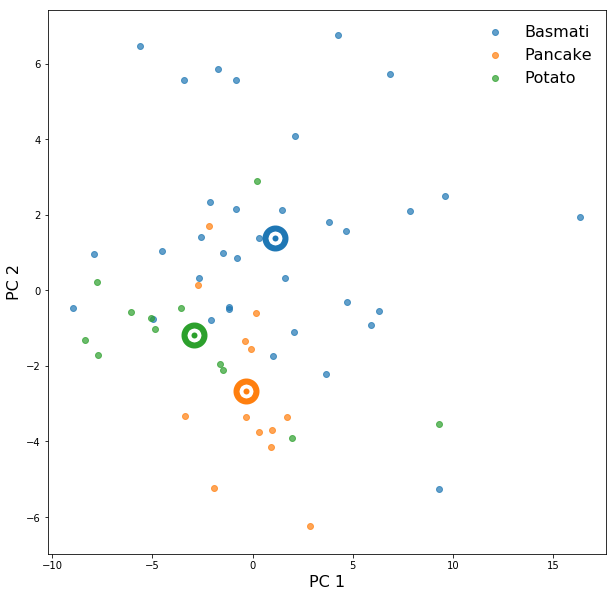

Basmati 35 46
Pancake 13 17
Potato 12 14


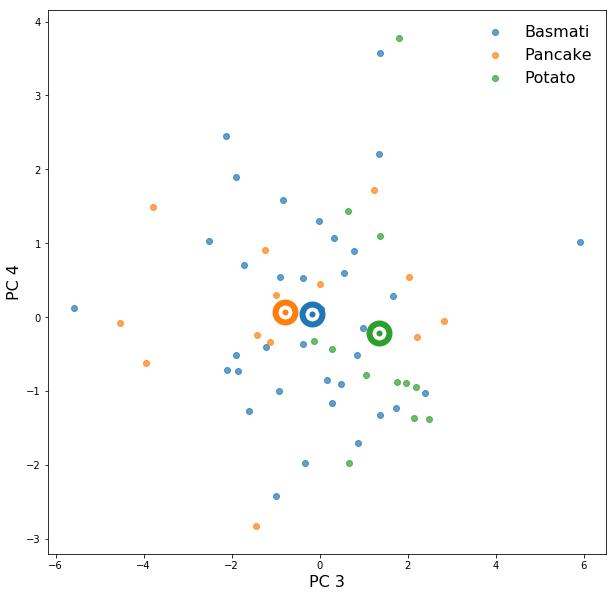

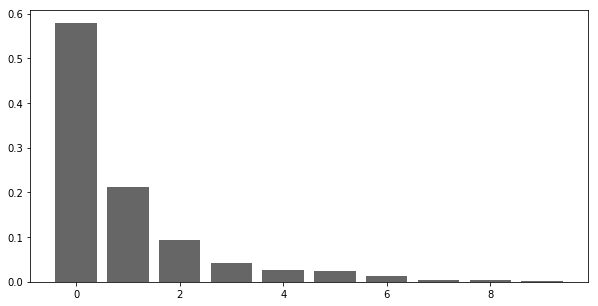

Basmati 35 46
Pancake 13 17
Potato 12 14


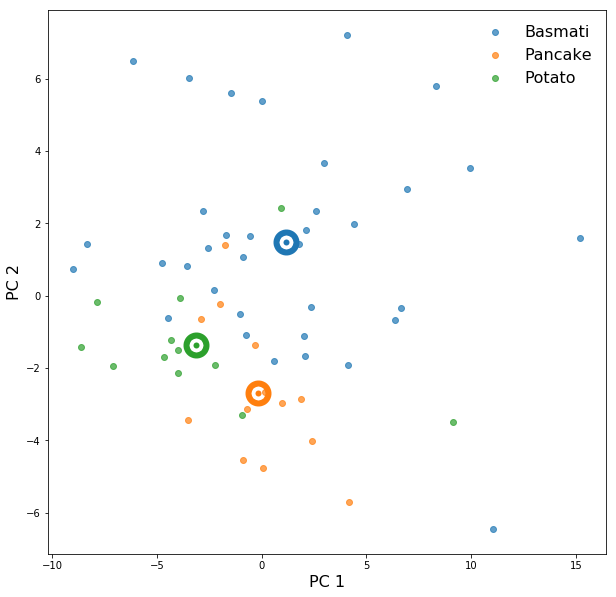

Basmati 35 46
Pancake 13 17
Potato 12 14


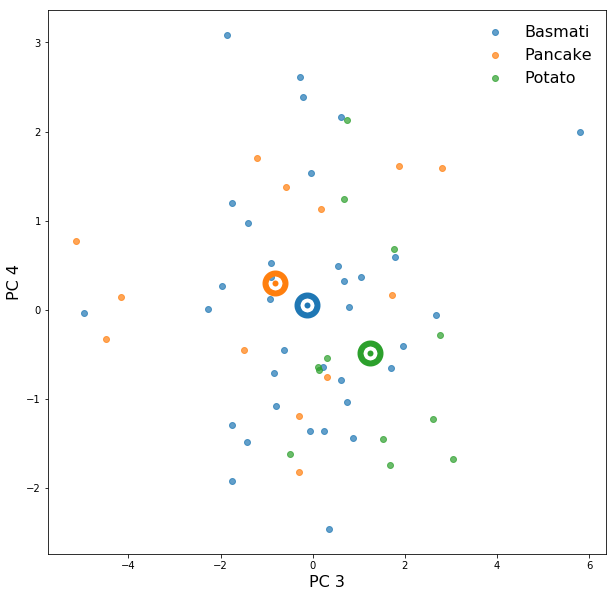

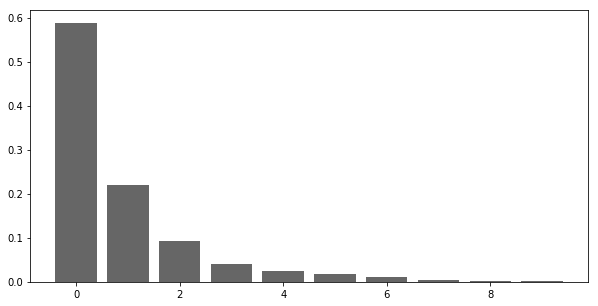

Basmati 35 46
Pancake 13 17
Potato 12 14


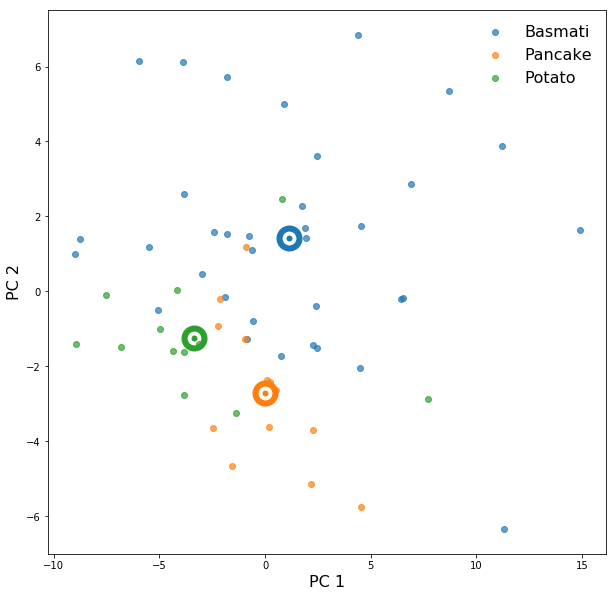

Basmati 35 46
Pancake 13 17
Potato 12 14


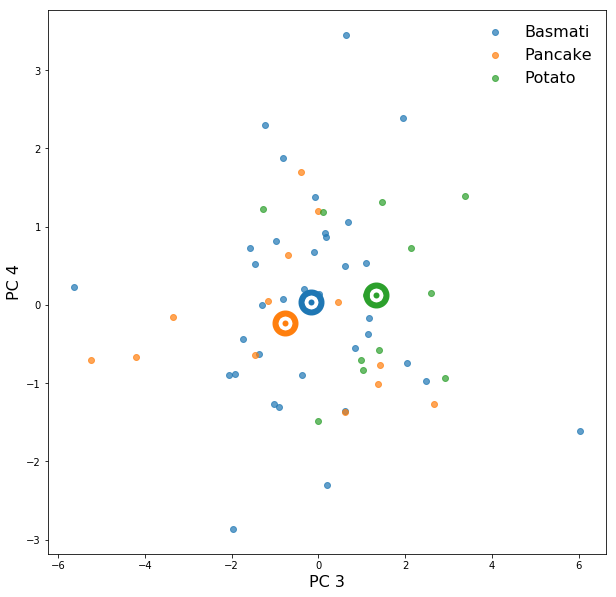

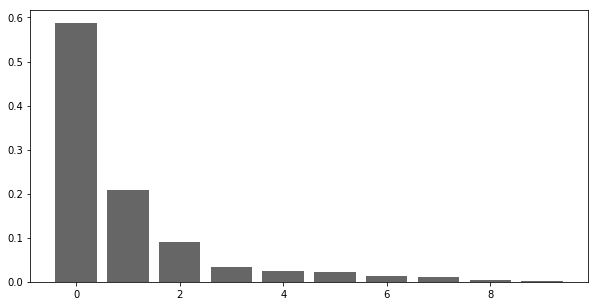

Basmati 35 46
Pancake 13 17
Potato 12 14


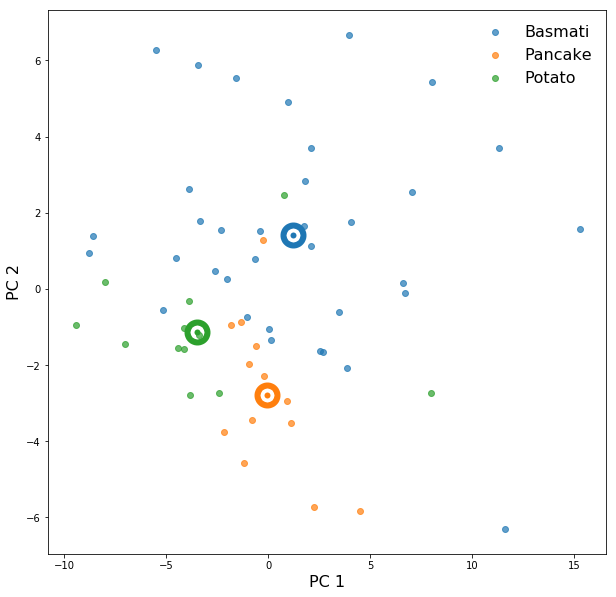

Basmati 35 46
Pancake 13 17
Potato 12 14


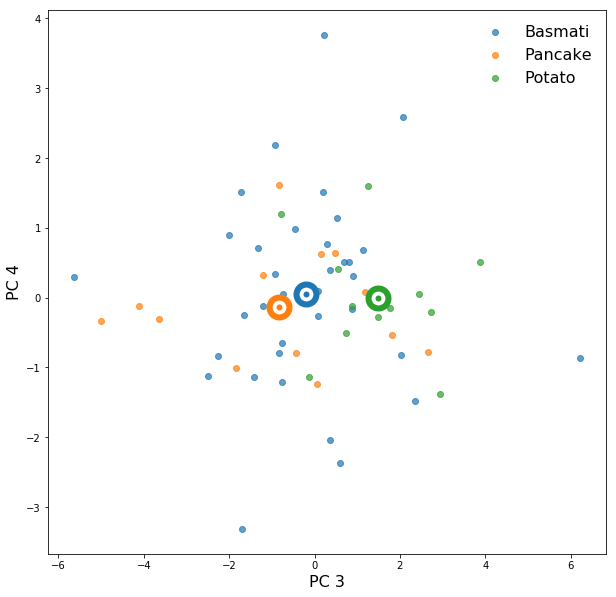

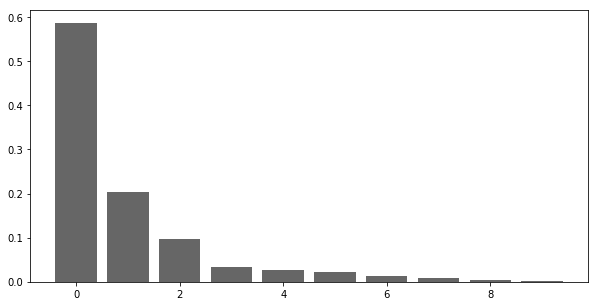

In [342]:
p_c_ids = list(path_dict.keys())

preds = []
infos = []
while len(infos) < 40001:
    print("%d" % len(infos), end="\r")
    c_ids = np.random.choice(p_c_ids, batch_size)
    ps = [path_dict[c_id] for c_id in c_ids]
    
    points, center_vertex_ids = pred.load_orphan_vertex_block_pychg(ps, n_points=n_points)
    p = pred.predict_points(model, points)
    
    for i_c_id in range(len(c_ids)):
        preds.append(p[i_c_id])
        infos.append([c_ids[i_c_id], center_vertex_ids[i_c_id]])
        
    if len(infos) % 10000 == 0:
        mean_infos = []
        mean_preds = []
        for u_id in np.unique(np.array(infos)[:, 0]):
            mean_infos.append([u_id])
            mean_preds.append(np.mean(np.array(preds)[np.array(infos)[:, 0] == u_id], axis=0))
            
        pca_plot_cell_types(np.array(mean_preds), np.array(mean_infos))
#         pca_plot(np.array(preds), np.array(infos))

## Better globilization of local prediction

In [343]:
cell_type_exs

{'Basmati': array([  7530910,  15197543,  19795555,  20940712,  22303113,  24616981,
         24661764,  25773939,  26247445,  34350273,  35609386,  41979397,
         48926789,  49007163,  51119378,  56364561,  58329660,  60151160,
         68826075,  71169280,  73670340,  74754681,  74819642,  76866666,
         78031559,  79140971,  79634115,  81620385,  82997957,  83544858,
         84621859,  86905106,  90110896,  90512168,  90578095,  94404095,
         95972378, 105681453, 108848511, 108871531, 115758274, 120018662,
        120309856, 123524851, 126197241, 130825349]),
 'Pancake': array([ 30350552,  33287597,  34410217,  39186369,  50179685,  52772537,
         53005573,  55020439,  62849707,  71785583,  80375280,  88426358,
         93401098, 101386609, 114189975, 123058375, 128765643]),
 'Potato': array([ 10434776,  21998219,  22041540,  30320925,  33488772,  40992542,
         49935190,  56028125,  75127172,  80375280,  84243684,  93306314,
         94975566, 111833406])}

In [344]:
def pca_plot(preds, labels, n_components=10, plot_axis=[[0, 1], [2, 3]]):
    preds = np.array(preds)

    features_n = preds.copy()
    std = np.std(features_n, axis=0)[None]
    std[std == 0] = 1
    features_n /= std
    features_n -= np.nanmean(features_n, axis=0)[None]

    pca = decomposition.PCA(n_components=n_components)
    features_t = pca.fit_transform(features_n)

    u_labels = np.unique(labels)

    for axis in plot_axis:
        plt.figure(figsize=(10, 10))

        for u_label in u_labels:
            m = labels == u_label
            plt.scatter(features_t[m, axis[0]], features_t[m, axis[1]], alpha=.7)

        plt.xlabel("PC %d" % (axis[0] + 1), fontsize=16)
        plt.ylabel("PC %d" % (axis[1] + 1), fontsize=16)

        plt.show()

In [345]:
preds = np.array(preds)
infos = np.array(infos)
cell_ids = infos[:, 0]

u_cell_ids = np.unique(infos[:, 0])

HIST FEATURES
Basmati 35 46
Pancake 13 17
Potato 12 14


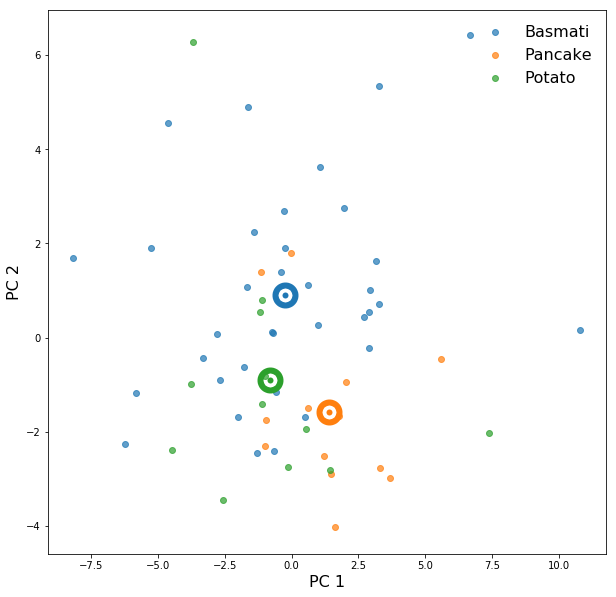

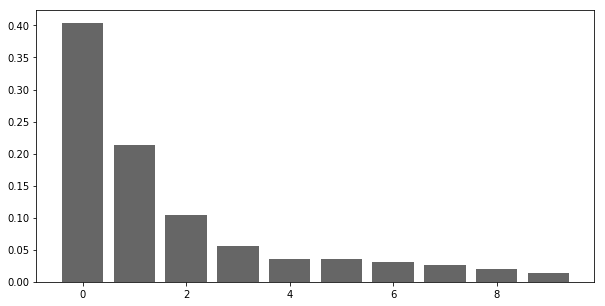

SIMPLE FEATURES
Basmati 35 46
Pancake 13 17
Potato 12 14


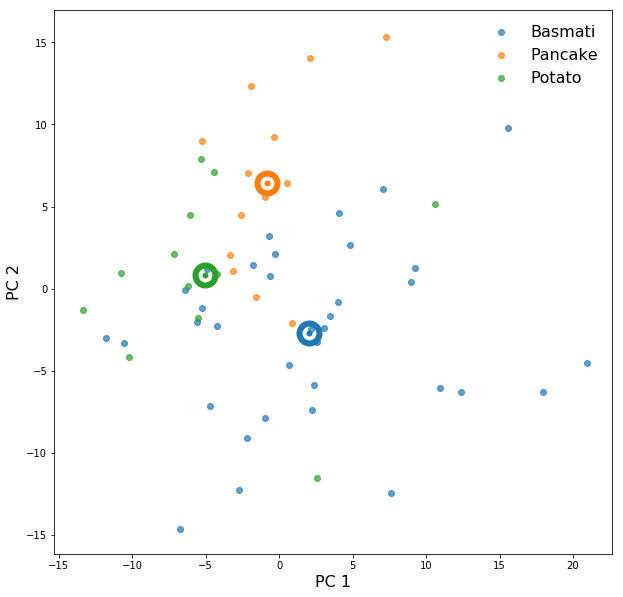

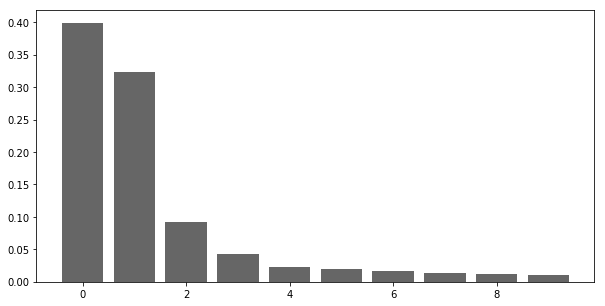

ALL FEATURES
Basmati 35 46
Pancake 13 17
Potato 12 14


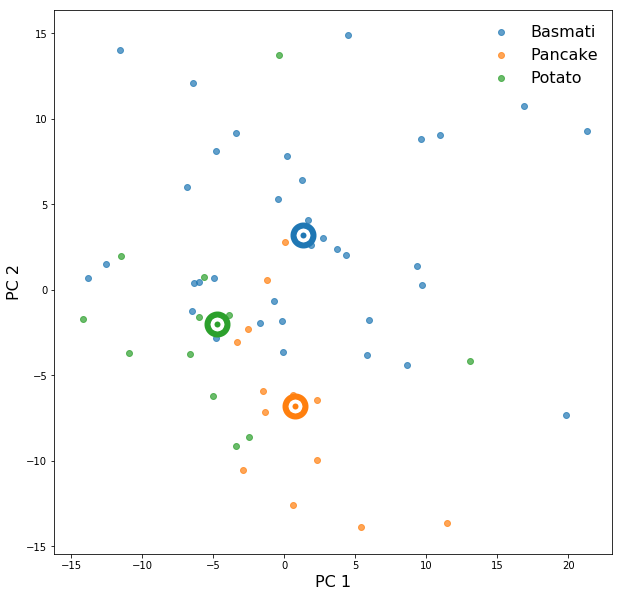

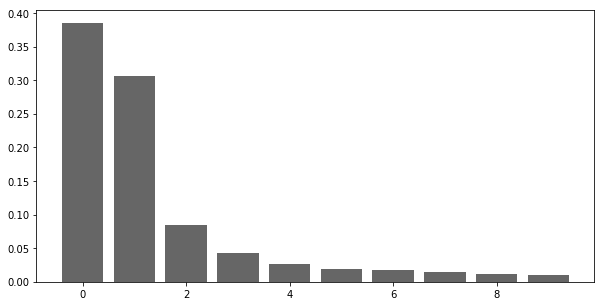

In [346]:
n = np.max(preds)

def hist_1d(arr):
    return np.histogram(arr / arr.max(), bins=np.linspace(0, 1, 11))[0]

def feat_stats(arr):
    return np.concatenate([np.mean(arr, axis=0),
                           np.median(arr, axis=0),
                           np.var(arr, axis=0)])

feats_infos = []
feats = []
hist_feats = []

for u_id in np.unique(np.array(infos)[:, 0]):
    feats_infos.append([u_id])
    
    m = np.array(infos)[:, 0] == u_id
    
    this_preds = preds[m]
    hist = np.apply_along_axis(hist_1d, axis=1, arr=this_preds)
    
    hist_feats.append(feat_stats(hist))
    feats.append(feat_stats(this_preds))

feats_infos = np.array(feats_infos)
hist_feats = np.array(hist_feats)
feats = np.array(feats)
all_feats = np.concatenate([hist_feats, feats], axis=1)
    
print("HIST FEATURES")
pca_plot_cell_types(hist_feats, feats_infos, plot_axis=[[0, 1]])

print("SIMPLE FEATURES")
pca_plot_cell_types(feats, feats_infos, plot_axis=[[0, 1]])

print("ALL FEATURES")
pca_plot_cell_types(all_feats, feats_infos, plot_axis=[[0, 1]])

## Classification

In [348]:
all_feats_n = all_feats.copy()
all_feats_n /= np.std(all_feats_n, axis=0)[None]
all_feats_n -= np.mean(all_feats_n, axis=0)[None]

all_feats_n = all_feats_n[:, ~np.any(np.isnan(all_feats_n), axis=0)]

/usr/people/svenmd/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/people/svenmd/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/people/svenmd/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until


In [361]:
labels = np.zeros(len(feats_infos), dtype=np.int)

for i_cell_id, cell_id in enumerate(feats_infos):
    for i_ct, ct in enumerate(cell_types):
        if cell_id in cell_type_exs[ct]:
            labels[i_cell_id] = i_ct
            continue

In [369]:
rfc = ensemble.RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                      class_weight="balanced_subsample")

accs = []
for i in range(10):
    accs.append(np.mean(model_selection.cross_val_score(rfc, all_feats_n, 
                                                        labels, 
                                                        cv=5)))
    print(accs[-1])
print(np.mean(accs), np.std(accs))
rfc.fit(all_feats_n, labels)

0.7611888111888112
0.7793706293706294
0.7430069930069931
0.7793706293706294
0.7627039627039627
0.7473193473193473
0.7458041958041959
0.7975524475524476
0.7445221445221446
0.7793706293706294
0.764020979020979 0.01809292191252821


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

## Prediction at synapses

In [ ]:
syn_df = pd.read_csv(HOME + "/seungmount/research/Nick/pinky100/p40_run2/pinky40_run2_remapped_and_filtered.df", index_col=0)
syn_df['centroid_x'] *= 4
syn_df['centroid_y'] *= 4
syn_df['centroid_z'] *= 40
syns = np.array(syn_df[['presyn_segid', 'postsyn_segid', 'centroid_x', 'centroid_y', 'centroid_z', 'size']])

In [ ]:
out_syn_dict = {}

for cell_type in cell_type_exs.keys():
    for cell_id in cell_type_exs[cell_type]:
        out_syn_dict[cell_id] = syns[syns[:, 0] == cell_id][:, [2, 3, 4]]True

In [ ]:
p_c_ids = list(path_dict.keys())

preds = []
infos = []
while len(infos) < 40001:
    print("%d" % len(infos), end="\r")
    c_ids = np.random.choice(p_c_ids, batch_size)
    ps = [path_dict[c_id] for c_id in c_ids]
    center_coords = [out_syn_dict[c_id][np.random.choice(len(out_syn_dict[c_id]), 1)][0] for c_id in c_ids]
    
    points, center_vertex_ids = pred.load_orphan_vertex_block_pychg(ps, n_points=n_points, center_coords=center_coords)
    p = pred.predict_points(model, points)
    
    for i_c_id in range(len(c_ids)):
        preds.append(p[i_c_id])
        infos.append([c_ids[i_c_id], center_vertex_ids[i_c_id]])
        
    if len(infos) % 10000 == 0:
        mean_infos = []
        mean_preds = []
        for u_id in np.unique(np.array(infos)[:, 0]):
            mean_infos.append([u_id])
            mean_preds.append(np.sum(np.array(preds)[np.array(infos)[:, 0] == u_id], axis=0))
            
        pca_plot(np.array(mean_preds), np.array(mean_infos))
#         pca_plot(np.array(preds), np.array(infos))